# KMeans 

In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

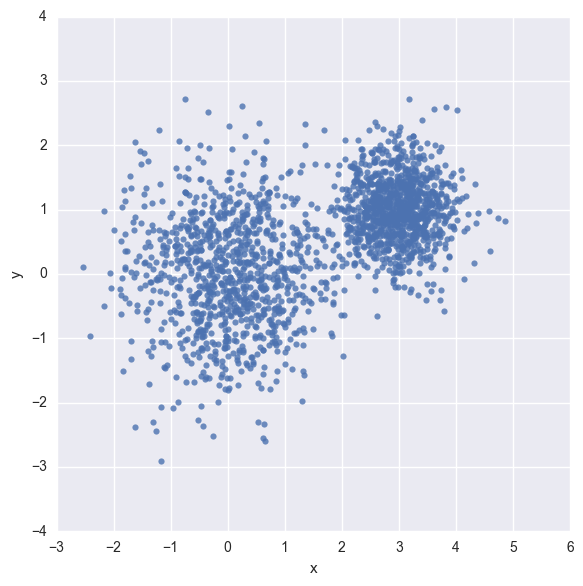

In [10]:
#Load data
def load_data(m):
    num_samples = m
    samples = []
    for i in xrange(num_samples):
        if np.random.random() > 0.5:
            samples.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
        else:
            samples.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])
    return samples

#Visualize the data
def visualize_data(samples):
    df = pd.DataFrame({"x": [v[0] for v in samples],
                     "y": [v[1] for v in samples]})
    sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
    plt.show()
    
samples = load_data(2000)
visualize_data(samples)

In [11]:
def KMeans(samples, k):
    vectors = tf.constant(samples)
    #Init centroids with k random samples
    centroids = tf.Variable(tf.slice(tf.random_shuffle(samples), [0, 0], [k, -1]))
    
    expand_vectors = tf.expand_dims(vectors, 0)
    expand_centroids = tf.expand_dims(centroids, 1)
    assignment = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expand_vectors, expand_centroids)), 2), 0)
    means